In [22]:
# import all libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import ZeroPadding2D,Convolution2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Dropout,Softmax,Flatten,Activation,BatchNormalization
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import tensorflow.keras.backend as K
import os
import cv2
import matplotlib.pyplot as plt
path=os.getcwd()
face_detection_path=os.getcwd(),"../"
print(os.getcwd())

/home/chinmay/sem-six/ai-ml/face_detection/face_detection_and_recongition_using_ir_camera/face_recognition


In [23]:
### importing all the face detetion methods from face_detection folder
import sys
import os
sys.path.append("../../face_detection_and_recongition_using_ir_camera/")
# print(sys.path)
print("importing face detection libraries....")
from face_detection.mtcnn_face_detection import mtcnn_face_detection
from face_detection.haarcascade_face_detection import haarcascade_face_detection
from face_detection.yoloface_face_detection import yoloface_detection
print("now you can use face detection libraries")

importing face detection libraries....
now you can use face detection libraries


In [24]:
# define vgg face model's architecture
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))	
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [25]:
# load vgg face model weights
# Remove last Softmax layer and get model upto last flatten layer #with outputs 2622 units 
model.summary()
vgg_face=Model(inputs=model.layers[0].input,outputs=model.layers[-2].output)
model.load_weights('vgg_face_weights.h5')


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_13 (ZeroPaddi (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_14 (ZeroPaddi (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_15 (ZeroPaddi (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 112, 112, 128)    

In [26]:
not_included={
   
   'subject_12',
   'subject_5',
   'subject_8',
   'subject_6',
   'subject_1',
    'subject_7',
}

In [9]:
import shutil
### python script to automatically divide data from tested_dataset folder
data_set_path=os.path.join(path,"tested_dataset")

images_crop_path=os.path.join(path,"images_crop")
images_test_path=os.path.join(path,"images_test_crop")

for file in os.listdir(data_set_path):
    #dataset_name="mtcnn"  #change to yolo or haarcasde to change datasets
    if file in not_included:
        continue
        
    dataset_name="yolo"
    
    ## create a folder inside images_crop and images_test_crop
    cur_crop_path=os.path.join(images_crop_path,file)
    cur_test_path=os.path.join(images_test_path,file)
    os.mkdir(cur_crop_path)
    os.mkdir(cur_test_path)
 
    specific_dataset_path=os.path.join(data_set_path,file,dataset_name)
    dataset=os.listdir(specific_dataset_path)
    
    partition=(len(dataset)*7)//10
    
    for i in range(partition):
        shutil.copy(os.path.join(specific_dataset_path,dataset[i]), os.path.join(cur_crop_path,dataset[i]))
    for i in range(partition,len(dataset)):
        shutil.copy(os.path.join(specific_dataset_path,dataset[i]), os.path.join(cur_test_path,dataset[i]))
        
        
    
    
    
    
    


FileExistsError: [Errno 17] File exists: '/home/chinmay/sem-six/ai-ml/face_detection/face_detection_and_recongition_using_ir_camera/face_recognition/images_crop/subject_3'

In [10]:
# Prepare Training Data
x_train=[]
y_train=[]
person_rep=dict()
person_folders=os.listdir(path+'/images_crop/')
for i,person in enumerate(person_folders):
  person_rep[i]=person
  image_names=os.listdir('images_crop/'+person+'/')
  print(person_rep[i])
  for image_name in image_names:
    print(image_name,end="\t")
    img=load_img(path+'/images_crop/'+person+'/'+image_name,target_size=(224,224))
    img=img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    img_encode=vgg_face(img)
    x_train.append(np.squeeze(K.eval(img_encode)).tolist())
    y_train.append(i)
  

print(person_rep)
   

subject_3
96.jpg	100.jpg	104.jpg	109.jpg	134.jpg	85.jpg	18.jpg	55.jpg	1.jpg	73.jpg	14.jpg	84.jpg	181.jpg	56.jpg	62.jpg	94.jpg	147.jpg	77.jpg	72.jpg	37.jpg	154.jpg	58.jpg	112.jpg	12.jpg	170.jpg	102.jpg	142.jpg	116.jpg	80.jpg	16.jpg	182.jpg	108.jpg	60.jpg	81.jpg	141.jpg	155.jpg	23.jpg	69.jpg	180.jpg	163.jpg	22.jpg	38.jpg	145.jpg	143.jpg	135.jpg	187.jpg	74.jpg	30.jpg	11.jpg	186.jpg	95.jpg	0.jpg	33.jpg	91.jpg	136.jpg	127.jpg	128.jpg	4.jpg	88.jpg	21.jpg	92.jpg	46.jpg	43.jpg	133.jpg	6.jpg	70.jpg	98.jpg	54.jpg	13.jpg	169.jpg	105.jpg	34.jpg	68.jpg	76.jpg	89.jpg	113.jpg	83.jpg	152.jpg	164.jpg	99.jpg	115.jpg	65.jpg	125.jpg	3.jpg	61.jpg	51.jpg	59.jpg	124.jpg	185.jpg	90.jpg	183.jpg	24.jpg	129.jpg	157.jpg	25.jpg	93.jpg	118.jpg	165.jpg	17.jpg	168.jpg	2.jpg	144.jpg	64.jpg	28.jpg	40.jpg	5.jpg	15.jpg	50.jpg	71.jpg	107.jpg	20.jpg	8.jpg	36.jpg	110.jpg	149.jpg	78.jpg	139.jpg	138.jpg	126.jpg	166.jpg	137.jpg	57.jpg	153.jpg	82.jpg	9.jpg	106.jpg	123.jpg	48.jpg	39.jpg	160.jpg	63.jpg	subject_9
96.jpg	100.jpg	10

195.jpg	282.jpg	96.jpg	100.jpg	104.jpg	109.jpg	134.jpg	85.jpg	18.jpg	241.jpg	55.jpg	1.jpg	199.jpg	289.jpg	250.jpg	73.jpg	14.jpg	84.jpg	236.jpg	181.jpg	56.jpg	62.jpg	94.jpg	147.jpg	77.jpg	72.jpg	37.jpg	154.jpg	215.jpg	58.jpg	112.jpg	12.jpg	170.jpg	102.jpg	209.jpg	142.jpg	262.jpg	116.jpg	219.jpg	197.jpg	80.jpg	217.jpg	16.jpg	268.jpg	182.jpg	256.jpg	108.jpg	280.jpg	60.jpg	81.jpg	141.jpg	155.jpg	23.jpg	69.jpg	190.jpg	204.jpg	180.jpg	294.jpg	163.jpg	210.jpg	274.jpg	22.jpg	38.jpg	145.jpg	143.jpg	135.jpg	187.jpg	224.jpg	229.jpg	228.jpg	203.jpg	216.jpg	74.jpg	30.jpg	11.jpg	186.jpg	233.jpg	95.jpg	252.jpg	0.jpg	33.jpg	266.jpg	269.jpg	293.jpg	91.jpg	136.jpg	230.jpg	276.jpg	127.jpg	285.jpg	128.jpg	221.jpg	4.jpg	245.jpg	244.jpg	88.jpg	231.jpg	21.jpg	92.jpg	238.jpg	218.jpg	227.jpg	46.jpg	255.jpg	248.jpg	43.jpg	292.jpg	133.jpg	291.jpg	191.jpg	222.jpg	6.jpg	70.jpg	98.jpg	54.jpg	13.jpg	169.jpg	273.jpg	257.jpg	105.jpg	34.jpg	68.jpg	76.jpg	89.jpg	113.jpg	226.jpg	299.jpg	83.jpg	152.jpg	189.jpg	243.jpg	284

In [11]:
person_rep

{0: 'subject_3',
 1: 'subject_9',
 2: 'subject_17',
 3: 'subject_14',
 4: 'subject_2',
 5: 'subject_10',
 6: 'subject_16',
 7: 'subject_11',
 8: 'subject_4',
 9: 'subject_15',
 10: 'subject_13'}

In [12]:
#Prepare Test Data
x_test=[]
y_test=[]
person_folders=os.listdir(path+'/images_test_crop/')
for i,person in enumerate(person_folders):
  image_names=os.listdir(path+'/images_test_crop/'+person)
  print(person)
  for image_name in image_names:
    print(image_name,end="\t")
    img=load_img(path+'/images_test_crop/'+person+'/'+image_name,target_size=(224,224))
    img=img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    img_encode=vgg_face(img)
    x_test.append(np.squeeze(K.eval(img_encode)).tolist())
    y_test.append(i)
  print()

subject_3
131.jpg	79.jpg	29.jpg	31.jpg	27.jpg	114.jpg	75.jpg	148.jpg	103.jpg	32.jpg	41.jpg	167.jpg	175.jpg	119.jpg	176.jpg	162.jpg	159.jpg	158.jpg	47.jpg	121.jpg	42.jpg	45.jpg	172.jpg	87.jpg	184.jpg	53.jpg	86.jpg	178.jpg	10.jpg	19.jpg	171.jpg	130.jpg	111.jpg	35.jpg	7.jpg	26.jpg	151.jpg	67.jpg	156.jpg	140.jpg	174.jpg	120.jpg	173.jpg	150.jpg	177.jpg	161.jpg	132.jpg	52.jpg	49.jpg	179.jpg	117.jpg	101.jpg	44.jpg	66.jpg	122.jpg	146.jpg	97.jpg	
subject_9
57.jpg	82.jpg	9.jpg	106.jpg	48.jpg	39.jpg	63.jpg	79.jpg	29.jpg	31.jpg	27.jpg	75.jpg	103.jpg	32.jpg	41.jpg	47.jpg	42.jpg	45.jpg	87.jpg	53.jpg	86.jpg	10.jpg	19.jpg	111.jpg	35.jpg	7.jpg	26.jpg	67.jpg	52.jpg	49.jpg	101.jpg	44.jpg	66.jpg	97.jpg	
subject_17
48.jpg	39.jpg	160.jpg	207.jpg	63.jpg	131.jpg	79.jpg	29.jpg	31.jpg	27.jpg	114.jpg	75.jpg	148.jpg	103.jpg	32.jpg	41.jpg	167.jpg	175.jpg	119.jpg	176.jpg	208.jpg	188.jpg	162.jpg	159.jpg	158.jpg	47.jpg	121.jpg	42.jpg	45.jpg	198.jpg	172.jpg	87.jpg	184.jpg	53.jpg	201.jpg	86.jpg	178.jpg	235.jpg	10.jpg	1

In [13]:
x_train=np.array(x_train) 
y_train=np.array(y_train)
x_test=np.array(x_test) 
y_test=np.array(y_test)


In [27]:
# Save test and train data for later use

np.save('train_data_yolo_11_faces',x_train)
np.save('train_labels_yolo_11_faces',y_train)
np.save('test_data_yolo_11_faces',x_test)
np.save('test_labels_yolo_11_faces',y_test)



x_train=np.load('train_data_yolo_11_faces.npy')
y_train=np.load('train_labels_yolo_11_faces.npy')
x_test=np.load('test_data_yolo_11_faces.npy')
y_test=np.load('test_labels_yolo_11_faces.npy')


In [28]:
# Softmax regressor to classify images based on encoding 
print(x_train.shape)
classifier_model=Sequential()
classifier_model.add(Dense(units=100,input_dim=x_train.shape[1],kernel_initializer='glorot_uniform'))
classifier_model.add(BatchNormalization())
classifier_model.add(Activation('tanh'))
classifier_model.add(Dropout(0.3))
classifier_model.add(Dense(units=6,kernel_initializer='glorot_uniform'))
classifier_model.add(BatchNormalization())
classifier_model.add(Activation('tanh'))
classifier_model.add(Dropout(0.2))
classifier_model.add(Dense(units=16,kernel_initializer='he_uniform'))
classifier_model.add(Activation('softmax'))
classifier_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='nadam',metrics=['accuracy'])

(1442, 2622)


In [29]:
# Fit the model with the training dataset
classifier_model.fit(x_train,y_train,epochs=72,validation_data=(x_test,y_test))

Epoch 1/72
46/46 [==============================] - 2s 7ms/step - loss: 1.4187 - accuracy: 0.6990 - val_loss: 1.2124 - val_accuracy: 0.8339
Epoch 2/72
46/46 [==============================] - 0s 5ms/step - loss: 1.1378 - accuracy: 0.8190 - val_loss: 0.8095 - val_accuracy: 0.9617
Epoch 3/72
46/46 [==============================] - 0s 5ms/step - loss: 1.0252 - accuracy: 0.8675 - val_loss: 0.7562 - val_accuracy: 0.9952
Epoch 4/72
46/46 [==============================] - 0s 5ms/step - loss: 0.9147 - accuracy: 0.8953 - val_loss: 0.6761 - val_accuracy: 0.9984
Epoch 5/72
46/46 [==============================] - 0s 5ms/step - loss: 0.8110 - accuracy: 0.9119 - val_loss: 0.5617 - val_accuracy: 0.9984
Epoch 6/72
46/46 [==============================] - 0s 5ms/step - loss: 0.7650 - accuracy: 0.9147 - val_loss: 0.5379 - val_accuracy: 1.0000
Epoch 7/72
46/46 [==============================] - 0s 5ms/step - loss: 0.6957 - accuracy: 0.9105 - val_loss: 0.4726 - val_accuracy: 1.0000
Epoch 8/72
46/46 [==

46/46 [==============================] - 0s 5ms/step - loss: 0.1844 - accuracy: 0.9570 - val_loss: 0.0412 - val_accuracy: 1.0000
Epoch 60/72
46/46 [==============================] - 0s 5ms/step - loss: 0.1794 - accuracy: 0.9570 - val_loss: 0.0660 - val_accuracy: 0.9936
Epoch 61/72
46/46 [==============================] - 0s 6ms/step - loss: 0.1812 - accuracy: 0.9487 - val_loss: 0.0428 - val_accuracy: 1.0000
Epoch 62/72
46/46 [==============================] - 0s 6ms/step - loss: 0.1827 - accuracy: 0.9563 - val_loss: 0.0362 - val_accuracy: 1.0000
Epoch 63/72
46/46 [==============================] - 0s 5ms/step - loss: 0.1767 - accuracy: 0.9570 - val_loss: 0.0354 - val_accuracy: 1.0000
Epoch 64/72
46/46 [==============================] - 0s 5ms/step - loss: 0.1591 - accuracy: 0.9619 - val_loss: 0.0342 - val_accuracy: 1.0000
Epoch 65/72
46/46 [==============================] - 0s 6ms/step - loss: 0.1732 - accuracy: 0.9577 - val_loss: 0.0353 - val_accuracy: 1.0000
Epoch 66/72
46/46 [======

In [30]:
tf.keras.models.save_model(classifier_model,path+'/face_classifier_model_yolo_11_faces.h5')

In [31]:
# classifier_model=tf.keras.models.load_model(path+'/face_classifier_model.h5') #8 people include jinka
#classifier_model=tf.keras.models.load_model(path+'/face_classifier_model_mtcnn.h5')#16 people
classifier_model=tf.keras.models.load_model(path+'/face_classifier_model_yolo_11_faces.h5')#10 people

In [32]:
def plot(img):
  plt.figure(figsize=(8,4))
  plt.imshow(img[:,:,::-1])
  plt.show()

In [33]:
#person_rep
# person_rep = {
#  0: 'subject_3',
#  1: 'subject_12',
#  2: 'subject_9',
#  3: 'subject_14',
#  4: 'subject_2',
#  5: 'subject_8',
#  6: 'subject_6',
#  7: 'subject_10',
#  8: 'subject_1',
#  9: 'subject_5',
#  10: 'subject_16',
#  11: 'subject_11',
#  12: 'subject_4',
#  13: 'subject_7',
#  14: 'subject_15',
#  15: 'subject_13'
# }

# {0: 'subject_3',
#  1: 'subject_9',
#  2: 'subject_17',
#  2: 'subject_14',
#  3: 'subject_2',
#  4: 'subject_10',
#  5: 'subject_16',
#  6: 'subject_11',
#  7: 'subject_4',
#  8: 'subject_15',
#  9: 'subject_13'}

#person_with name
#person_rep
person_rep={
    0:'Athreya',
    1:'Jinka',
    2:'Jagadesh',
    3:'Kaushik',
    4:'Anvith',
    5: 'Charan',
    6: 'Vaibav',
    7: 'Palaksha',
    8: 'Chinmay',
    9: 'Karuna Sagar',
    10: 'Amith', 
}

In [34]:
from yoloface import face_analysis
face = face_analysis()

yolov3-tiny_face.weights:: status : file already exists
yolov3_tiny_face.cfg:: status : file already exists
face_detection.weights:: status : file already exists
face_detection.cfg:: status : file already exists


[[ 260  273  158  149]
 [1024  350  160  165]
 [ 713  235  170  159]
 [ 433  352  195  149]
 [1273  286  172  163]
 [  32  230  199  136]]
0.9456452 Amith
0.7271636 Anvith
0.927802 Karuna Sagar
0.979707 Athreya
0.9785402 Vaibav
0.37224254 not detected


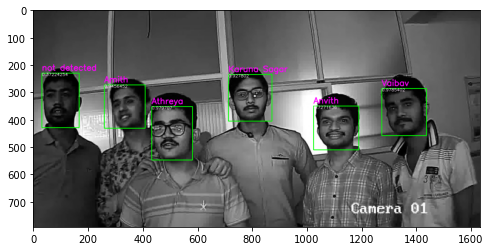

[[519 205 304 249]]
0.9834192 Athreya


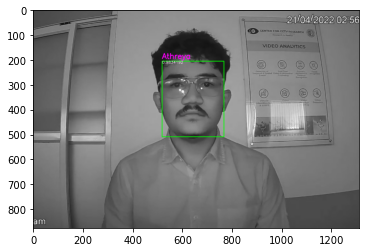

In [37]:
## testing using haarcascade
haar_cascade = cv2.CascadeClassifier('../face_detection/haarcascade_frontalface_default.xml')
for img_name in os.listdir(path+'/images_test/'):
    if img_name=='crop_img.jpg':
        continue

    img_name_f = path+'/images_test/'+img_name
    img = cv2.imread(img_name_f)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #rect = haar_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=9)
    
    
    img, box, conf = face.face_detection(
        frame_arr=img, frame_status=True, model='full')
    rect=np.array([np.array(xi) for xi in box])
    
    print(rect)
    for (x, y, w, h) in rect:
        cv2.rectangle(gray, (x, y), (x+w, y+h), (0, 255, 0), thickness=2)
        img_crop = gray[y:y+h, x:x+w]
        cv2.imwrite(path+'/images_test/crop_img.jpg',img_crop)
        crop_img=load_img(path+'/images_test/crop_img.jpg',target_size=(224,224))
        crop_img=img_to_array(crop_img)
        crop_img=np.expand_dims(crop_img,axis=0)
        crop_img=preprocess_input(crop_img)
        img_encode=vgg_face(crop_img)
        embed=K.eval(img_encode)
        person=classifier_model.predict(embed)
        name=person_rep[np.argmax(person)]
        os.remove(path+'/images_test/crop_img.jpg')
        
        #haarcascade
        #cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0), 2)
        
        #yoloface
        cv2.rectangle(img,(x,y),(x+h,y+w),(0,255,0), 2)
        
        if(np.max(person)<0.5):
           name="not detected"
        print(np.max(person),name)
        
        img=cv2.putText(img,name,(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,255),2,cv2.LINE_AA)
        img=cv2.putText(img,str(np.max(person)),(x,y+10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,233,255),1,cv2.LINE_AA)
        
    cv2.imwrite(path+'/Predictions/'+img_name,img)
    plot(img)

In [ ]:
### face detection in video
cap = cv2.VideoCapture('test_1.mp4')
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
frame_size = (frame_width,frame_height)
fps = 20

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output_video_1.mp4',fourcc,fps,frame_size)
count = 0

while True:
    ret,frame = cap.read()
    if not ret:
        break
    print(count)
    count+=1
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    __, box, conf = face.face_detection(
        frame_arr=frame, frame_status=True, model='full')
    faces_rect = np.array([np.array(xi) for xi in box])
    for (x, y, w, h) in faces_rect:
        cv2.rectangle(gray, (x, y), (x+h, y+w), (0, 255, 0), thickness=2)
        img_crop = gray[y:y+w, x:x+h]
        try:
            cv2.imwrite(path+'/sample1.jpg',img_crop)
        except:
            continue
        crop_img=load_img(path+'/sample1.jpg',target_size=(224,224))
        crop_img=img_to_array(crop_img)
        crop_img=np.expand_dims(crop_img,axis=0)
        crop_img=preprocess_input(crop_img)
        img_encode=vgg_face(crop_img)
        embed=K.eval(img_encode)
        person=classifier_model.predict(embed)
        name=person_rep[np.argmax(person)]
        cv2.rectangle(frame,(x,y),(x+h,y+w),(0,255,0), 2)
        if(np.max(person)>0.90):
            img=cv2.putText(frame,name,(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,255),2,cv2.LINE_AA)
        img=cv2.putText(frame,str(np.max(person)),(x,y+10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
    cv2.imshow('i',frame)
    out.write(frame)
    if cv2.waitKey(1) & 0xFF == ord('a'):
        break
cap.release() 
out.release()
cv2.destroyAllWindows()